# Research Questions (Q):

1. Witch genres are the most common(number of movies made)?
2. Which genres have high avg. budged and ravenue?
2. Which genres have high avg. Profit?
3. Which movies have high avg. popularity?
4. which movies have highest number of movies with an voting avg. >= 8?

In [184]:
import pandas as pd

movies = pd.read_csv(r'C:\Users\Bojan\OneDrive\Desktop\Analyst\Pandas Avgust 2024\10. Projects\imdb_movies.csv')


In [185]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [186]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 25)

In [187]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


In [10]:
movies[movies.duplicated(inplace = True)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
movies.drop_duplicates(inplace=True)

In [14]:
movies[movies.duplicated()] # no more duplicates 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [15]:
movies.dropna(subset='genres',inplace=True) #subset=['genres'] 

Adding columng - "profit"

In [19]:
movies['profit'] = movies['revenue'] - movies['budget']

In [230]:
movies_genres = movies[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]

In [231]:
movies_genres.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360


In [221]:
from pandas import Series, DataFrame

In [232]:
split = movies_genres['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [233]:
split.name = 'genres_split'
del movies_genres['genres']
movies_genres = movies_genres.join(split)

### Research Questions (Q):

1. Witch genres are the most common(number of movies made)?

In [224]:
movies_genres.groupby('genres_split').count().sort_values(by= ['original_title'], ascending=False)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit
genres_split,,,,,,,,,
Drama,4760,4760,4760,4760,4760,4760,4760,4760,4760
Comedy,3793,3793,3793,3793,3793,3793,3793,3793,3793
Thriller,2907,2907,2907,2907,2907,2907,2907,2907,2907
Action,2384,2384,2384,2384,2384,2384,2384,2384,2384
Romance,1712,1712,1712,1712,1712,1712,1712,1712,1712
Horror,1637,1637,1637,1637,1637,1637,1637,1637,1637
Adventure,1471,1471,1471,1471,1471,1471,1471,1471,1471
Crime,1354,1354,1354,1354,1354,1354,1354,1354,1354
Family,1231,1231,1231,1231,1231,1231,1231,1231,1231


In [225]:
movies_genres.groupby('genres_split')['original_title'].count().sort_values(ascending=False)

genres_split
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: original_title, dtype: int64

In [226]:
genres_count = pd.DataFrame(movies_genres.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending=False)
#This works as well
# pd.DataFrame(movies_genres.groupby('genres_split')['original_title'].count()).sort_values('original_title', ascending=False)

In [227]:
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<AxesSubplot:title={'center':'Movies Per Genre in %'}, ylabel='original_title'>

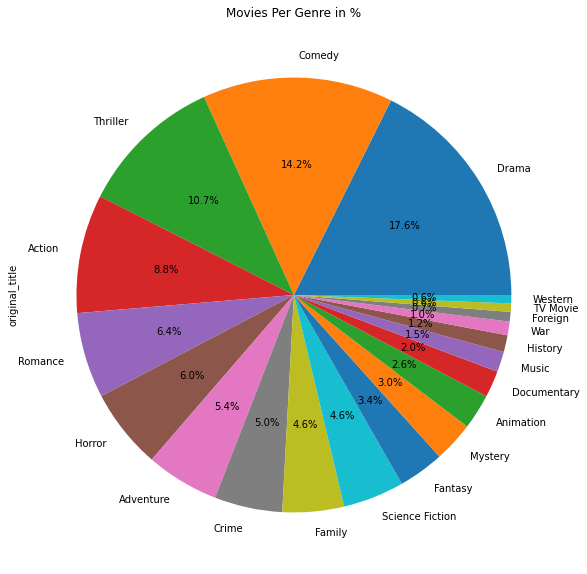

In [228]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

<AxesSubplot:title={'center':'Movies Per Genre'}, ylabel='genres_split'>

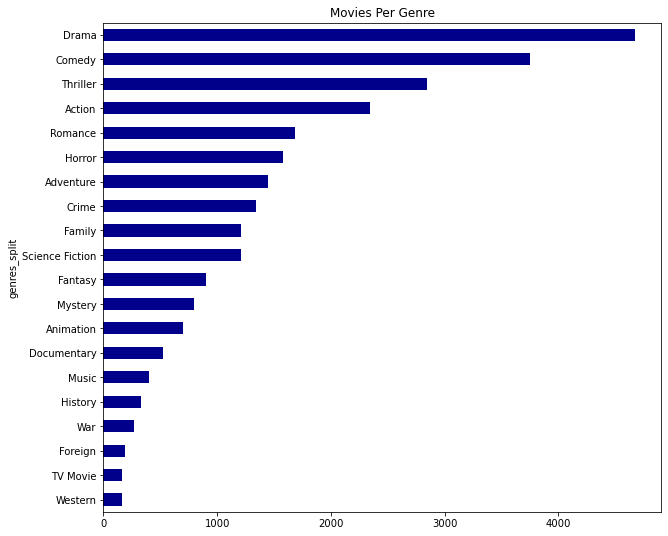

In [71]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue', figsize = (10,9))

2. Which genres have high avg. budged and ravenue?

In [88]:
genres_avg = movies_genres.groupby('genres_split').mean()
pd.options.display.float_format = '{:2f}'.format
# to take off scientific notation
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [98]:
genres_avg.sort_values('revenue', ascending=True, inplace=True)

<AxesSubplot:title={'center':'Budget and Revenue by Genre'}, ylabel='genres_split'>

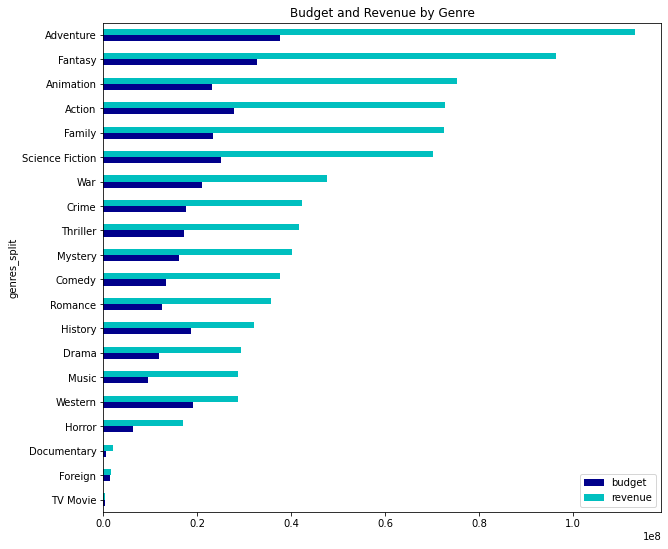

In [99]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize = (10,9))

3. Which genres have high avg. Profit?

In [100]:
genres_avg.sort_values('profit', ascending=True, inplace=True)

<AxesSubplot:title={'center':'Profit by Genre'}, ylabel='genres_split'>

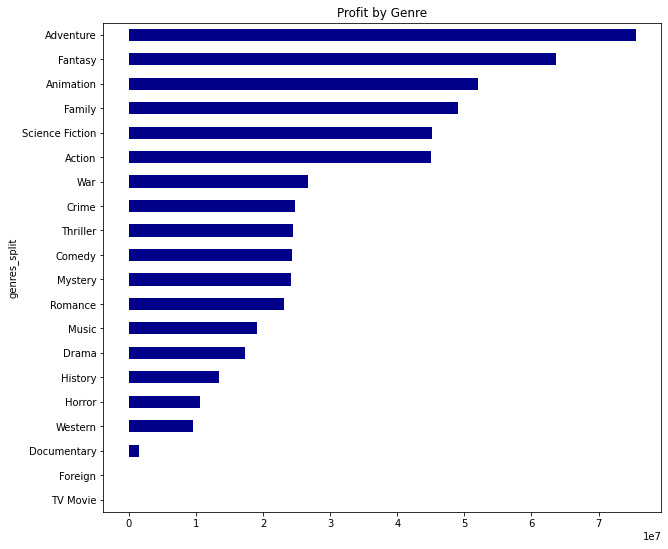

In [103]:
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = 'DarkBlue', figsize = (10,9))

Alex's answer was the same! xD

4. Which movies have high avg. popularity?

In [109]:
genres_avg.sort_values('popularity', ascending=True, inplace=True)

In [110]:
genres_avg['popularity']

genres_split
Documentary       0.181432
Foreign           0.191496
TV Movie          0.270896
Horror            0.465357
Music             0.487321
History           0.575936
Western           0.590615
Drama             0.591495
Romance           0.592082
Comedy            0.592607
Mystery           0.690012
War               0.727683
Thriller          0.741563
Crime             0.744930
Family            0.786668
Animation         0.852182
Action            0.926274
Fantasy           0.992840
Science Fiction   1.001548
Adventure         1.154259
Name: popularity, dtype: float64

<AxesSubplot:title={'center':'Average Popularity by Genre'}, ylabel='genres_split'>

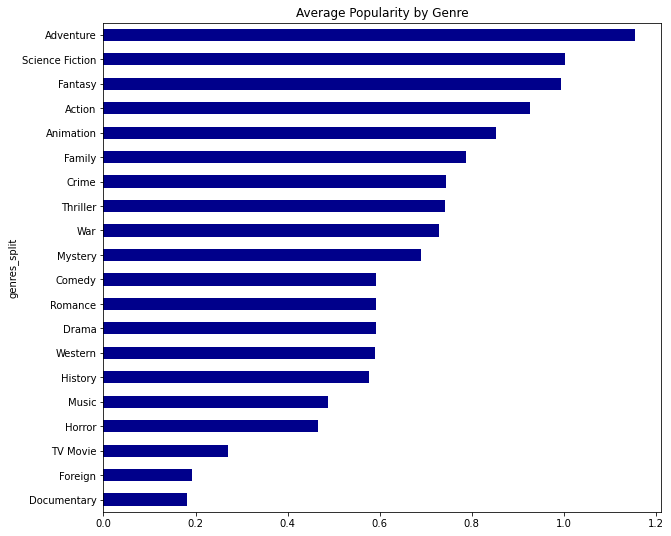

In [112]:
genres_avg['popularity'].plot.barh(title = "Average Popularity by Genre", figsize = (10,9), color = "DarkBlue")

5. which genres have highest number of movies with an voting avg. >= 8?

In [118]:
movies_genres = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [124]:
split1 = movies_genres['genres'].str.split('|').apply(Series,1).stack()
split1.index = split1.index.droplevel(-1)
split1
split1.name = 'genres split'
del movies_genres['genres']
movies_genres = movies_genres.join(split1)

In [167]:
high_votes_fifty = movies_genres[(movies_genres['vote_count'] >= 50) & (movies_genres['vote_average'] >= 8)] 
high_votes_zero = movies_genres[ movies_genres['vote_average'] >= 8] 

In [182]:
movies_count_fifty = pd.DataFrame(high_votes_fifty.groupby('genres split')['original_title'].count()).sort_values(by='original_title', ascending=False)
movies_count_zero = pd.DataFrame(high_votes_zero.groupby('genres split').original_title.nunique()).sort_values(by='original_title', ascending=False)

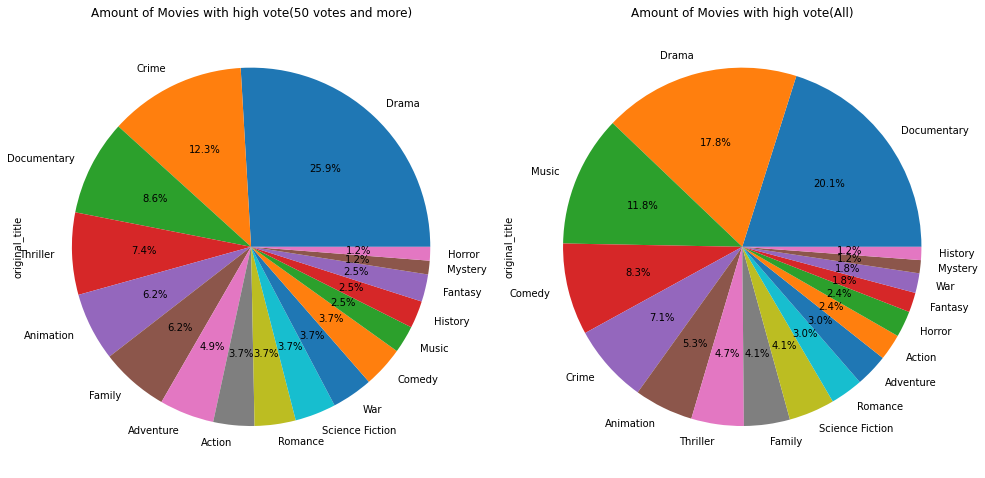

In [183]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)


movies_count_fifty['original_title'].plot.pie(title = "Amount of Movies with high vote(50 votes and more)", figsize = (14,12), autopct = '%1.1f%%', ax = axs[0])
movies_count_zero['original_title'].plot.pie(title = "Amount of Movies with high vote(All)", figsize = (14,12), autopct = '%1.1f%%', ax = axs[1])

plt.tight_layout()
plt.show()

# Research Hypotheses (H):

1. The best movies according to vote avg. return high profita and ravenue.


In [188]:
movies.drop_duplicates(inplace=True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genres = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [198]:
movies_counted = movies_genres[movies_genres['vote_count'] >= 50]
movies_counted.corr(method='spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<AxesSubplot:xlabel='vote_average', ylabel='profit'>

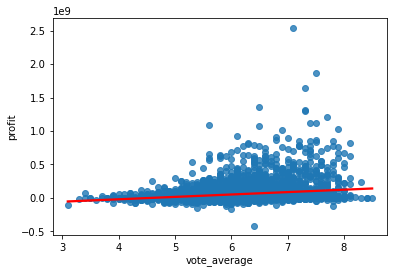

In [203]:
import seaborn as sns
sns.regplot(x='vote_average', y='profit', data= movies_counted, line_kws= {'color':'red'})

<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

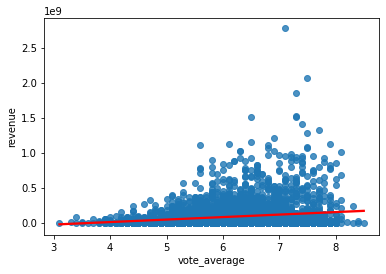

In [204]:
sns.regplot(x='vote_average', y='revenue', data= movies_counted, line_kws= {'color':'red'})

2. the best movies according to popularity rerturn  high profit and ravenue.


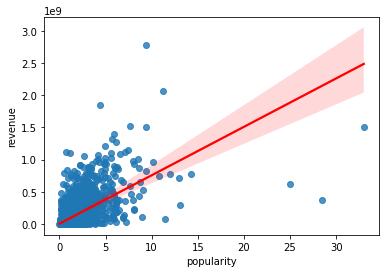

<Figure size 720x360 with 0 Axes>

In [213]:
import matplotlib.pyplot as plt
sns.regplot(x='popularity', y='revenue', data= movies_counted, line_kws= {'color':'red'})
plt.figure(figsize = (10,5))
plt.show()

3. highly budgeted movies return high profit.

<AxesSubplot:xlabel='budget', ylabel='profit'>

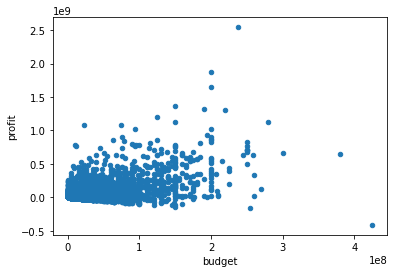

In [216]:
movies_counted.plot.scatter(x='budget',y='profit')

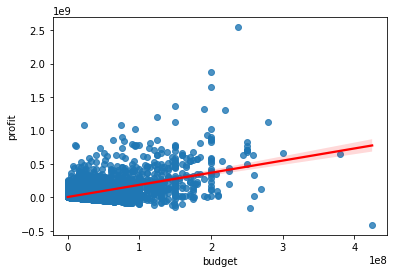

<Figure size 720x360 with 0 Axes>

In [217]:
sns.regplot(x='budget', y='profit', data= movies_counted, line_kws= {'color':'red'})
plt.figure(figsize = (10,5))
plt.show()

4. Highly budgeted movies have a high popularity.

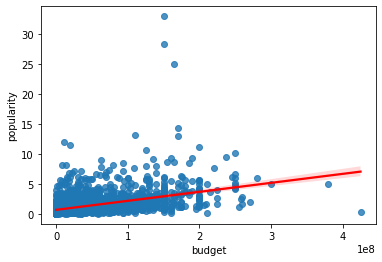

<Figure size 720x360 with 0 Axes>

In [218]:
sns.regplot(x='budget', y='popularity', data= movies_counted, line_kws= {'color':'red'})
plt.figure(figsize = (10,5))
plt.show()

5.Look at Profit per Genre per Year

In [254]:
movies_genres.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [238]:
time_genre = pd.DataFrame(movies_genres.groupby(['release_year','genres_split'])['profit'].mean())

In [245]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = 'release_year') #[] working but not necessary 

Text(0.5, 1.0, 'Genres by Profit per Year')

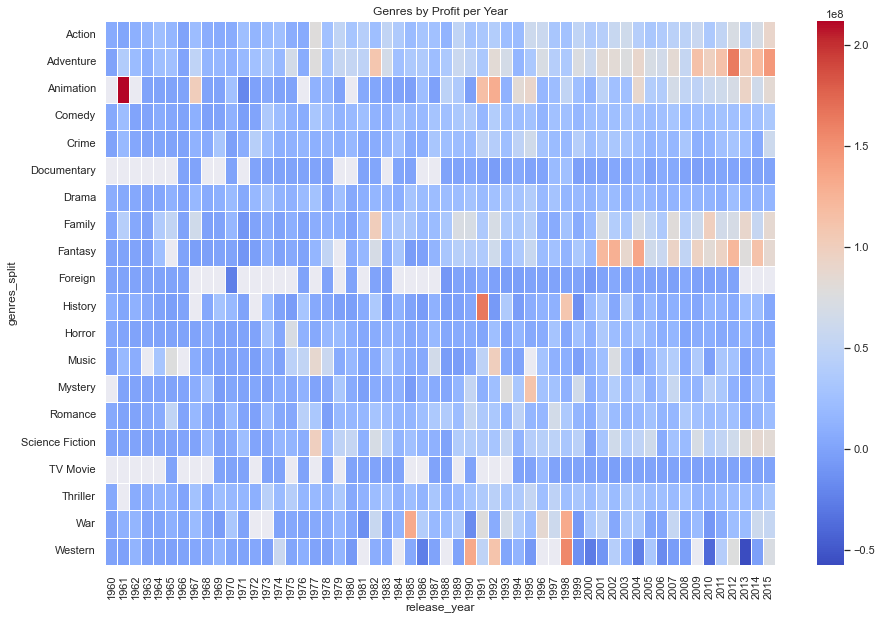

In [251]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(data=final_genre, cmap = 'coolwarm', linewidths= .5)
plt.title('Genres by Profit per Year')

Text(0.5, 1.0, 'Genres by Profit per Year')

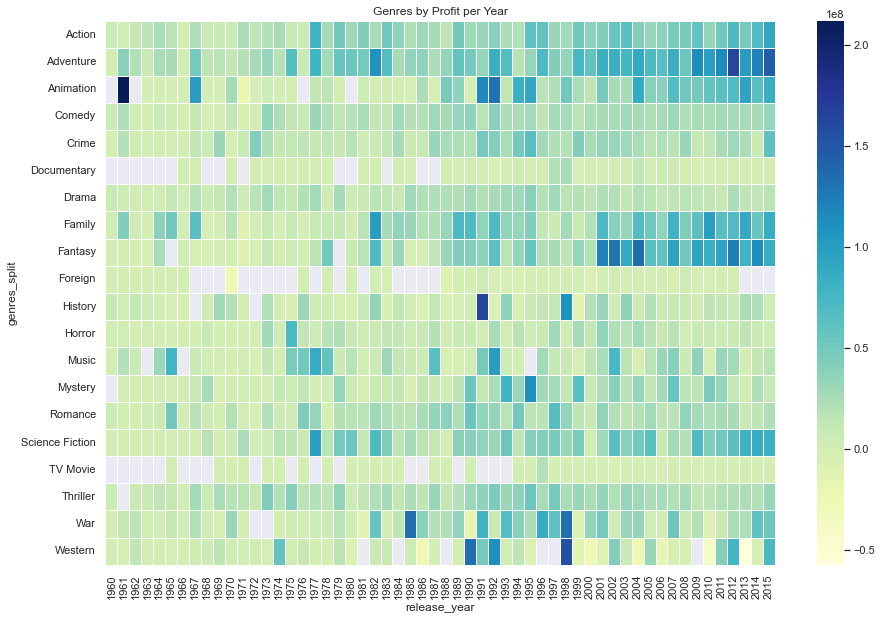

In [253]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(data=final_genre, cmap = 'YlGnBu', linewidths= .5)
plt.title('Genres by Profit per Year')